## Washington State Fire Data Analysis

### This analysis looks over two different datasets and observes patterns and possible outcomes of the data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Turn the data into DataFrames using pandas**

In [5]:
DNR_2008_PRESENT = pd.read_csv(r'C:\Users\jimmy\data\DNR_Fire_Statistics_2008_-_Present.csv')
LARGE_FIRES = pd.read_csv(r'C:\Users\jimmy\data\Washington_Large_Fires_1973-2022.csv')
DNR_1970_2007 = pd.read_csv(r'C:\Users\jimmy\data\DNR_Fire_Statistics_1970-2007.csv')
DNR_2008_PRESENT.info()
DNR_1970_2007.info()
LARGE_FIRES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26363 entries, 0 to 26362
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X                             26363 non-null  int64  
 1   Y                             26363 non-null  int64  
 2   OBJECTID                      26363 non-null  int64  
 3   FIREEVENT_ID                  25914 non-null  float64
 4   INCIDENT_NO                   21571 non-null  float64
 5   INCIDENT_NM                   26363 non-null  object 
 6   INCIDENT_ID                   26363 non-null  int64  
 7   COUNTY_LABEL_NM               26363 non-null  object 
 8   FIRE_TWP_WHOLE_NO             26363 non-null  int64  
 9   FIRE_TWP_FRACT_NO             26363 non-null  int64  
 10  FIRE_RGE_WHOLE_NO             26363 non-null  int64  
 11  FIRE_RGE_FRACT_NO             26363 non-null  int64  
 12  FIRE_RGE_DIR_FLG              26363 non-null  object 
 13  F

Let's start looking for patterns. Lets find out the acreage burned per year. First we need to edit the first dataset so that we have a column for the year.

In [6]:
DNR_2008_PRESENT['DSCVR_DT'] = DNR_2008_PRESENT['DSCVR_DT'].astype(str)
DNR_2008_PRESENT['YEAR'] = DNR_2008_PRESENT['DSCVR_DT'].str[:4].astype(int)
DNR_2008_PRESENT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26363 entries, 0 to 26362
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X                             26363 non-null  int64  
 1   Y                             26363 non-null  int64  
 2   OBJECTID                      26363 non-null  int64  
 3   FIREEVENT_ID                  25914 non-null  float64
 4   INCIDENT_NO                   21571 non-null  float64
 5   INCIDENT_NM                   26363 non-null  object 
 6   INCIDENT_ID                   26363 non-null  int64  
 7   COUNTY_LABEL_NM               26363 non-null  object 
 8   FIRE_TWP_WHOLE_NO             26363 non-null  int64  
 9   FIRE_TWP_FRACT_NO             26363 non-null  int64  
 10  FIRE_RGE_WHOLE_NO             26363 non-null  int64  
 11  FIRE_RGE_FRACT_NO             26363 non-null  int64  
 12  FIRE_RGE_DIR_FLG              26363 non-null  object 
 13  F

In [7]:
DNR_BY_YEAR = DNR_2008_PRESENT.copy()
DNR_ACRES = DNR_BY_YEAR[['YEAR','ACRES_BURNED']]
DNR_ACRES = DNR_ACRES.loc[(DNR_ACRES['YEAR']) >= 2008]
DNR_ACRES = DNR_ACRES.groupby(['YEAR']).sum()
display(DNR_ACRES)

,ACRES_BURNED
YEAR,
2008,41635.73
2009,25610.86
2010,27682.93
2011,9419.10
2012,116468.13
2013,147707.50
2014,315134.20
2015,753568.76
2016,16429.74


Lets create a graph with this data to see what it might look like

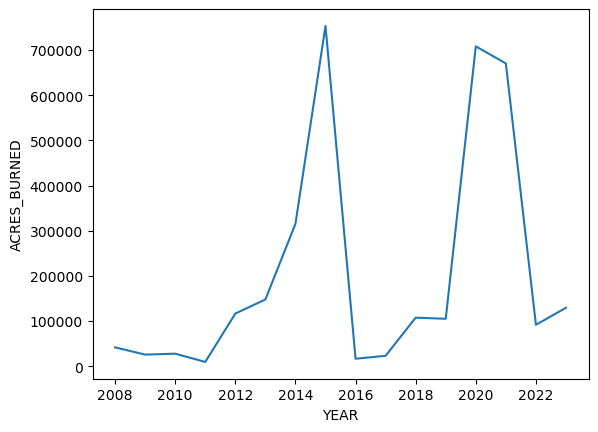

In [8]:
sns.lineplot(x='YEAR',y='ACRES_BURNED',data=DNR_ACRES)
plt.show()

Looks likes there might be an upwards trend, but lets see what the older fire data shows. Lets merge all the DNR statistics using pandas merge function

In [9]:
DNR_1970_2007['DSCVR_DT'] = DNR_1970_2007['START_DT'].astype(str)
DNR_1970_2007['YEAR'] = DNR_1970_2007['START_DT'].str[:4].astype(int)
DNR_1970_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38116 entries, 0 to 38115
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   X                        38116 non-null  int64  
 1   Y                        38116 non-null  int64  
 2   OBJECTID                 38116 non-null  int64  
 3   COUNTY_LABEL_NM          38113 non-null  object 
 4   FIREGCAUSE_LABEL_NM      38116 non-null  object 
 5   ACRES_BURNED             38116 non-null  float64
 6   START_DT                 38116 non-null  object 
 7   FIREEVNT_CLASS_LABEL_NM  38116 non-null  object 
 8   FIREEVNT_NM              4032 non-null   object 
 9   DSCVR_DT                 38116 non-null  object 
 10  YEAR                     38116 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(6)
memory usage: 3.1+ MB


In [10]:
DNR_DATA = pd.concat([DNR_2008_PRESENT,DNR_1970_2007],axis=0)
DNR_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64479 entries, 0 to 38115
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X                             64479 non-null  int64  
 1   Y                             64479 non-null  int64  
 2   OBJECTID                      64479 non-null  int64  
 3   FIREEVENT_ID                  25914 non-null  float64
 4   INCIDENT_NO                   21571 non-null  float64
 5   INCIDENT_NM                   26363 non-null  object 
 6   INCIDENT_ID                   26363 non-null  float64
 7   COUNTY_LABEL_NM               64476 non-null  object 
 8   FIRE_TWP_WHOLE_NO             26363 non-null  float64
 9   FIRE_TWP_FRACT_NO             26363 non-null  float64
 10  FIRE_RGE_WHOLE_NO             26363 non-null  float64
 11  FIRE_RGE_FRACT_NO             26363 non-null  float64
 12  FIRE_RGE_DIR_FLG              26363 non-null  object 
 13  F

In [33]:
DNR_TOTAL_BY_YEAR = DNR_DATA.copy()
DNR_ALL_ACRES = DNR_TOTAL_BY_YEAR[['YEAR','ACRES_BURNED']]
DNR_ALL_ACRES = DNR_ALL_ACRES.groupby(['YEAR']).sum()
display(DNR_ALL_ACRES)
DNR_ALL_ACRES = DNR_ALL_ACRES.reset_index()
DNR_ALL_ACRES.info()

,ACRES_BURNED
YEAR,
1970,7148.80
1971,741.00
1972,2535.80
1973,10125.70
1974,6035.20
1975,2028.40
1976,9149.90
1977,7547.60
1978,4289.70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          54 non-null     int64  
 1   ACRES_BURNED  54 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 996.0 bytes


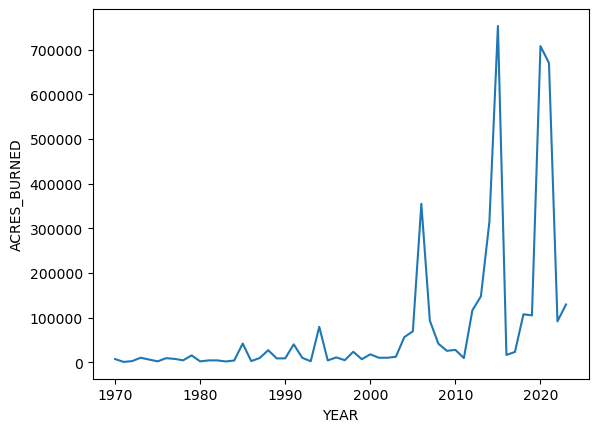

In [12]:
sns.lineplot(x='YEAR',y='ACRES_BURNED',data=DNR_ALL_ACRES)
plt.show()

Here, we can see an obvious rise in the 21st century. Before 2000, the acres burned is more more tame and much less then in recent years.

There are also very extreme years in the acres burned due to fires in recent years, as we can tell from the large spikes in the model.

Let's compare this graph with the graph we will achieve with the large fires data.
Note:We also are removing a outlier data point that skews our graph. The point is likely a input error.

C:\Users\jimmy\AppData\Local\Temp\ipykernel_11240\492968153.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LARGE_FIRES_BY_YEAR = LARGE_FIRES.groupby(['YEAR']).sum()


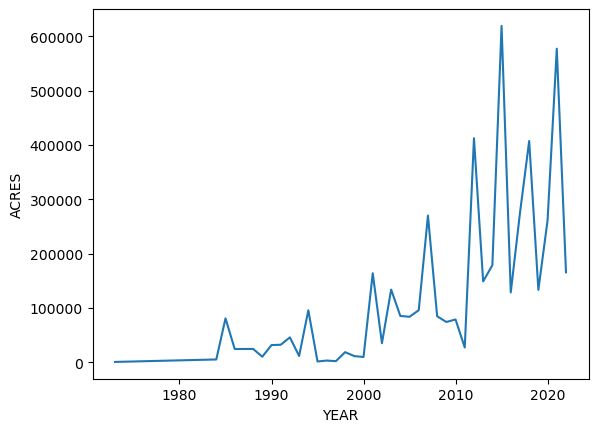

In [48]:
LARGE_FIRES = LARGE_FIRES.loc[(LARGE_FIRES['ACRES']) < 100000]
LARGE_FIRES_BY_YEAR = LARGE_FIRES.groupby(['YEAR']).sum()
sns.lineplot(x='YEAR',y='ACRES',data=LARGE_FIRES_BY_YEAR)
LARGE_FIRES_BY_YEAR = LARGE_FIRES_BY_YEAR.reset_index()
plt.show()

Both of these graphs depict a very similar trend that more and more acres of land are burning per year.
This means that as time moves on, environments are either more susceptible to wildfire or more fires are being caused by humans

Now, let's figure out what the leading cause of these fires are.

In [14]:
CAUSES_COUNTS = DNR_DATA['FIREGCAUSE_LABEL_NM'].value_counts()
CAUSES = pd.DataFrame({'CAUSE':CAUSES_COUNTS.index,'FIRES':CAUSES_COUNTS.values})
CAUSES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CAUSE   21 non-null     object
 1   FIRES   21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


Graphed:

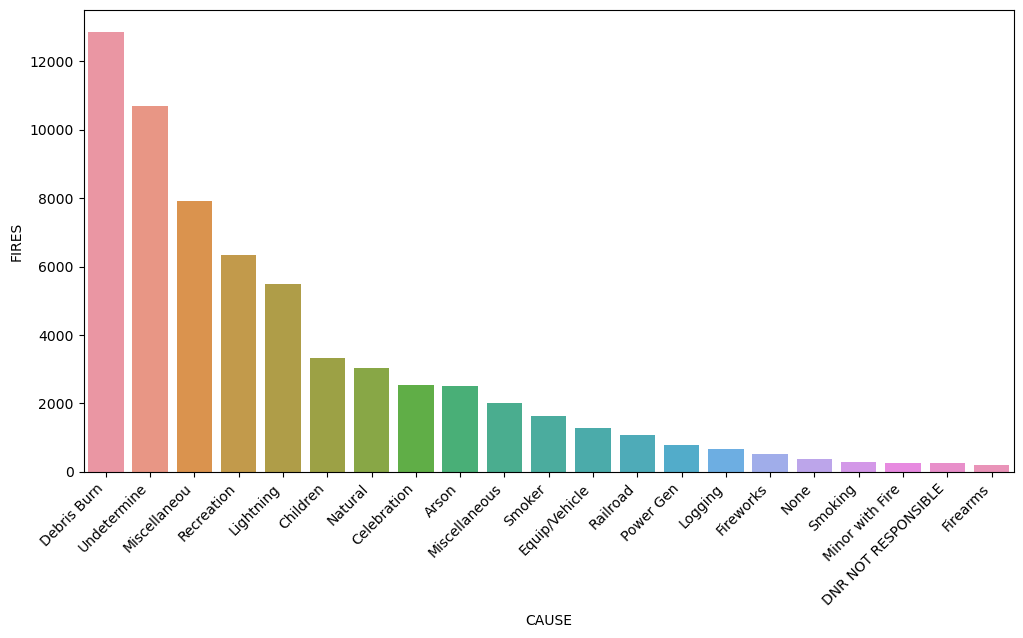

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(CAUSES, x='CAUSE', y='FIRES')
plt.xticks(rotation=45, ha='right')
plt.show()

Lets see the difference between natural causes and human causes:

In [16]:
print(CAUSES.to_string())

                  CAUSE  FIRES
0           Debris Burn  12863
1           Undetermine  10696
2          Miscellaneou   7918
3            Recreation   6337
4             Lightning   5490
5              Children   3315
6               Natural   3045
7           Celebration   2538
8                 Arson   2498
9         Miscellaneous   2003
10               Smoker   1637
11        Equip/Vehicle   1295
12             Railroad   1067
13            Power Gen    784
14              Logging    658
15            Fireworks    537
16                 None    381
17              Smoking    283
18      Minor with Fire    249
19  DNR NOT RESPONSIBLE    248
20             Firearms    188


In [17]:
print(5490 + 3045)

8535


All of the fires that were caused by humans are below

In [18]:
print(12863+7918+6337+3315+2538+2498+2003+1637+1295+1067+784+658+537+381+283+249+188)

44551


This would mean a rate of:

In [19]:
print((8535/(44551+8535))*100)

16.077685265418378


16.078% of all fires in Washington State tracked by the DNR are natural. The rest were caused by humans.

The vast majority of all fires are caused by humans. This data backs what was said in the sources we found during our research. It shows that the fires that burn and ravage our ecosystems, forests, and plains are statisticly more likely to be caused by humans.

##  Let's start our predictions. Here we will start our quantitative predictions ##

We'll use a simple regression model. A regression model is one of the more simpler machine learning models that focuses on quantitative values.

We will use numpy, a powerful math library created for python

[ 7.22196973e-02 -1.32978305e+02]


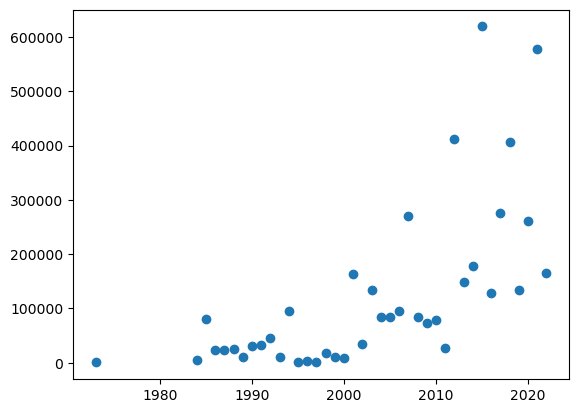

In [53]:
import numpy as np

x = LARGE_FIRES_BY_YEAR['YEAR']
y = LARGE_FIRES_BY_YEAR['ACRES']
plt.scatter(x,y)
fit = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
print(fit)

Let's graph the large fires and the acres they burn. Here we can see an obvious exponential pattern.

Our new equation is 1.77115237\times10^{-58}\cdot1.074891469^{x}. or (1.77115237*10^-58)(1.074891469^x) where x is the year from 1970 onwards.